In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

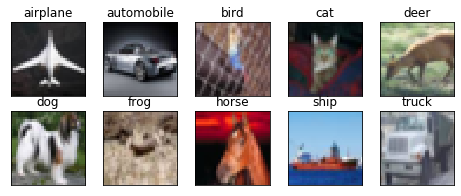

In [24]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #30
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))#28
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#14
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))#12
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))#10
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#5
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))#3
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))#1
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 29s 75ms/step - loss: 1.9065 - acc: 0.2615 - val_loss: 1.4753 - val_acc: 0.4379
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.4169 - acc: 0.4816 - val_loss: 1.2212 - val_acc: 0.5540
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1822 - acc: 0.5780 - val_loss: 0.9963 - val_acc: 0.6453
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 1.0462 - acc: 0.6317 - val_loss: 0.9779 - val_acc: 0.6567
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9415 - acc: 0.6730 - val_loss: 0.8296 - val_acc: 0.7102
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8743 - acc: 0.7001 - val_loss: 0.7913 - val_acc: 0.7288
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8125 - acc: 0.7202 - val_loss: 0.7576 - val_acc: 0.7352
Epoch 8/50
390/390 [==============================] - 

KeyboardInterrupt: ignored

In [41]:
model = Sequential()
model.add(SeparableConv2D(128, 3, 3, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# model.add(BatchNormalization())
model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(SeparableConv2D(64, 1, 1))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


# model.add(SeparableConv2D(32, 3, 3))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), input_shape=(32, 32, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (1, 1))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_241 (Separa (None, 30, 30, 128)       539       
_________________________________________________________________
batch_normalization_128 (Bat (None, 30, 30, 128)       512       
_________________________________________________________________
activation_156 (Activation)  (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_142 (Dropout)        (None, 30, 30, 128)       0         
_________________________________________________________________
separable_conv2d_242 (Separa (None, 30, 30, 64)        8384      
_________________________________________________________________
separable_conv2d_243 (Separa (None, 28, 28, 64)        4736      
_________________________________________________________________
batch_normalization_129 (Bat (None, 28, 28, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 55s 141ms/step - loss: 1.9258 - acc: 0.2572 - val_loss: 2.1151 - val_acc: 0.3072
Epoch 2/50
390/390 [==============================] - 46s 119ms/step - loss: 1.5441 - acc: 0.4229 - val_loss: 1.4471 - val_acc: 0.4751
Epoch 3/50
390/390 [==============================] - 47s 119ms/step - loss: 1.3616 - acc: 0.5113 - val_loss: 1.2362 - val_acc: 0.5545
Epoch 4/50
390/390 [==============================] - 47s 119ms/step - loss: 1.2581 - acc: 0.5534 - val_loss: 1.3102 - val_acc: 0.5393
Epoch 5/50
390/390 [==============================] - 47s 119ms/step - loss: 1.1836 - acc: 0.5827 - val_loss: 1.1722 - val_acc: 0.5853
Epoch 6/50
390/390 [==============================] - 47s 119ms/step - loss: 1.1305 - acc: 0.6003 - val_loss: 1.0856 - val_acc: 0.6141
Epoch 7/50
390/390 [==============================] - 47s 119ms/step - loss: 1.0896 - acc: 0.6177 - val_loss: 1.2148 - val_acc: 0.5853
Epoch 8/50
390/390 [==============================] - 4

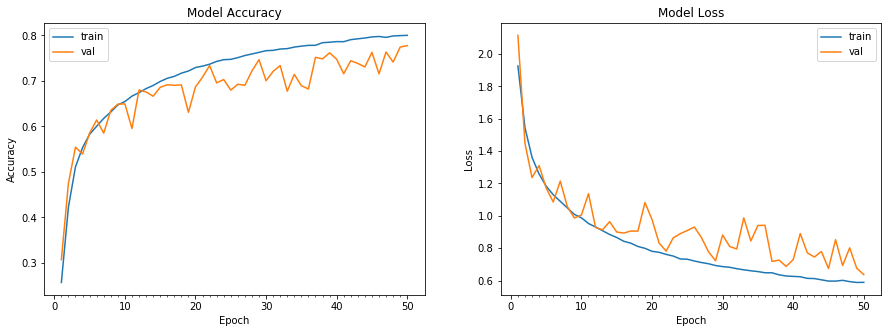

Accuracy on test data is: 77.75


In [42]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))